# 3. 케라스와 텐서플로우

__감사말__

프랑소와 숄레의 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 3장에 사용된 코드에 대한 설명을 담고 있으며 텐서플로우 2.6 버전 이상에서 작성되었습니다. 소스코드를 공개한 저자에게 감사드립니다.

__구글 코랩 설정__

'런타임 -> 런타임 유형 변경' 메뉴에서 GPU를 지정한다.
TensorFlow 버전을 확인하려면 아래 명령문을 실행한다.

In [2]:
import tensorflow as tf
tf.__version__

'2.13.0'

TensorFlow가 GPU를 사용하는지 여부를 확인하려면 아래 명령문을 실행한다.
아래와 같은 결과가 나오면 GPU가 제대로 지원됨을 의미한다.

```
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
```

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**참고**

아래 코드에 대한 자세한 설명은
[케라스와 텐서플로우](https://codingalzi.github.io/dlp2/keras_and_tf.html)를
참고한다.

## `GradientTape` 활용

*경우 1) 하나의 변수에 대한 그레이디언트*

아래 코드는 제곱 함수의 $x = 3$에서의 미분값인 6을 계산한다.

$$
f(x) = x^2 \quad \Longrightarrow \quad \nabla f(x) = \frac{df(x)}{dx} = 2x
$$

In [4]:
input_var = tf.Variable(initial_value=3.)

with tf.GradientTape() as tape:
    result = tf.square(input_var)

gradient = tape.gradient(result, input_var)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


*경우 2) 임의의 텐서 연산에 대한 그레이디언트*

In [5]:
x = tf.Variable(tf.random.uniform((2, 2)))

with tf.GradientTape() as tape:
    y = x**2 + 3

grad_of_y_wrt_x = tape.gradient(y, x)

변수 `x`의 모양은 다음과 같다.

$$
x =
\begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22}
\end{bmatrix}
$$

`y`를 `x`의 함수로 표현하면 다음과 같다.

$$
y = f(x) = x^2 + 3 =
\begin{bmatrix}
x_{11}^2 + 3 & x_{12}^2 + 3 \\
x_{21}^2 + 3 & x_{22}^2 + 3
\end{bmatrix}
$$

텐서 `x`에 대한 그레이디언트는 다음과 같다.

$$
\nabla f(x) =
\begin{bmatrix}
2 x_{11} & 2 x_{12} \\
2 x_{21} & 2 x_{22}
\end{bmatrix}
$$

In [6]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.49534583, 1.7430537 ],
       [0.7332664 , 0.11324262]], dtype=float32)>

그레이디언트 계산에 사용된 `x`는 다음과 같다.

In [7]:
x

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.24767292, 0.87152684],
       [0.36663318, 0.05662131]], dtype=float32)>

*경우 3) 변수들의 리스트에 대한 그레이언트*

In [8]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b

grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

텐서 `x`와 변수 `W`, `b`의 모양은 다음과 같다.

$$
x =
\begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22}
\end{bmatrix},
\qquad
W =
\begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22}
\end{bmatrix},
\qquad
b =
\begin{bmatrix}
b_{1} & b_{2}
\end{bmatrix}
$$

`y`를 `W`와 `b`의 함수로 표현하면 다음과 같다.

$$
y = f(W, b) = x\cdot W + b =
\begin{bmatrix}
x_{11}\cdot w_{11} + x_{12}\cdot w_{21} + b_1 & x_{11}\cdot w_{12} + x_{12}\cdot w_{22} + b_2 \\
x_{21}\cdot w_{11} + x_{22}\cdot w_{21} + b_1 & x_{21}\cdot w_{12} + x_{22}\cdot w_{22} + b_2 \\
\end{bmatrix}
$$

텐서 `x`에 대한 그레이디언트는 다음과 같다.

$$
\nabla f(W, b) =
\begin{bmatrix}
    \begin{bmatrix}
    x_{11} + x_{21} & x_{11} + x_{21} \\
    x_{12} + x_{22} & x_{12} + x_{22}
    \end{bmatrix},
    \begin{bmatrix}
    2 & 2
    \end{bmatrix}    
\end{bmatrix}
$$

In [9]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.09243417, 0.09243417],
        [1.2872581 , 1.2872581 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

그레이디언트 계산에 사용된 `x`는 다음과 같다.

In [10]:
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.08821833, 0.8131149 ],
       [0.00421584, 0.47414327]], dtype=float32)>

**예제: 순수 텐서플로우로 선형 분류기 구현**

순수 텐서플로우 API만을 이용하여 선형 분류 신경망을 구현한다.

**_1단계: 데이터셋 생성_**

In [12]:
import numpy as np

In [13]:
num_samples_per_class = 1000

# 음성 데이터셋
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

# 양성 데이터셋
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

두 데이터셋을 합쳐서 훈련셋, 즉, 모델의 입력값으로 지정한다.
자료형을 `np.float32`로 지정함에 주의하라.
그렇게 하지 않으면 `np.float64`로 지정되어 보다 많은 메모리와 실행시간을 요구한다.

In [14]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

음성 샘플의 타깃은 0, 양성 샘플의 타깃은 1로 지정한다.

In [15]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

양성, 음성 샘플을 색깔로 구분하면 다음과 같다.

- `inputs[:, 0]`: x 좌표
- `inputs[:, 1]`: x 좌표
- `c=targets[:, 0]`: 0 또는 1에 따른 색상 지정

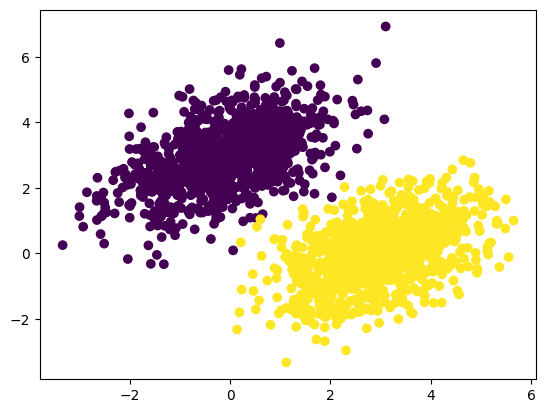

In [16]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**_2단계: 선형 회귀 모델 훈련에 필요한 가중치와 편향 변수 텐서 생성_**

In [17]:
input_dim = 2     # 입력 샘플의 특성이 2개
output_dim = 1    # 하나의 값으로 출력

# 가중치: 무작위 초기화
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))

# 편향: 0으로 초기화
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**_3단계: 모델 선언(포워드 패스 담당)_**

신경망 모델을 훈련할 때 입력값에 대한 예측값을 계산하는 과정인
포워드 패스를 함수로 구현한다.
간단한 모델 표현을 위해 활성화 함수는 사용하지 않는다.

In [18]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**_4단계: 손실 함수 지정_**

타깃과 예측값 사이의 평균 제곱 오차를 손실값으로 사용한다.
아래 코드에서 `tf.reduce_mean()` 함수는 넘파이의 `np.mean()`처럼
평균값을 계산하지만 텐서플로우의 텐서를 대상으로 한다.

In [19]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**_5단계: 훈련 스텝(백워드 패스와 역전파) 지정_**

하나의 배치에 대해 예측값을 계산한 후에 손실 함수의 그레이디언트를
계산한 후에 가중치와 편향을 업데이트하는 함수를 선언한다.
그레이디언트 계산은 그레이디언트 테이프를 이용한다.

In [20]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**_6단계: 훈련 루프 지정_**

반복해서 훈련한 내용을 지정한다.
여기서는 설명을 간단하게 하기 위해 미니 배치가 아닌 배치 훈련을 구현한다.
전체 훈련셋을 총 40번 반복 학습할 때마다 손실값을 출력하도록 한다.

In [21]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.6593
Loss at step 1: 0.5085
Loss at step 2: 0.1849
Loss at step 3: 0.1410
Loss at step 4: 0.1276
Loss at step 5: 0.1182
Loss at step 6: 0.1099
Loss at step 7: 0.1024
Loss at step 8: 0.0956
Loss at step 9: 0.0894
Loss at step 10: 0.0838
Loss at step 11: 0.0786
Loss at step 12: 0.0739
Loss at step 13: 0.0696
Loss at step 14: 0.0657
Loss at step 15: 0.0622
Loss at step 16: 0.0590
Loss at step 17: 0.0560
Loss at step 18: 0.0533
Loss at step 19: 0.0509
Loss at step 20: 0.0487
Loss at step 21: 0.0466
Loss at step 22: 0.0448
Loss at step 23: 0.0431
Loss at step 24: 0.0416
Loss at step 25: 0.0402
Loss at step 26: 0.0389
Loss at step 27: 0.0377
Loss at step 28: 0.0367
Loss at step 29: 0.0357
Loss at step 30: 0.0348
Loss at step 31: 0.0340
Loss at step 32: 0.0333
Loss at step 33: 0.0327
Loss at step 34: 0.0321
Loss at step 35: 0.0315
Loss at step 36: 0.0310
Loss at step 37: 0.0305
Loss at step 38: 0.0301
Loss at step 39: 0.0298


훈련상태를 보면 여전히 개선의 여지가 보인다. 따라서 학습을 좀 더 시켜본다.

In [22]:
for step in range(100):
    loss = training_step(inputs, targets)
    if step % 10 == 0:
        print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0294
Loss at step 10: 0.0273
Loss at step 20: 0.0264
Loss at step 30: 0.0261
Loss at step 40: 0.0260
Loss at step 50: 0.0259
Loss at step 60: 0.0259
Loss at step 70: 0.0259
Loss at step 80: 0.0259
Loss at step 90: 0.0259


**_7단계: 결정경계 예측_**

In [23]:
predictions = model(inputs)

모델의 예측값이 0.5보다 클 때 양성으로 판정하는 것이 좋은데
이유는 샘플들의 레이블이 0 또는 1이기 때문이다.
모델은 훈련과정 중에 음성 샘플은 최대한 0에,
양성 샘플은 최대한 1에 가까운 값으로 예측하여 손실값을 최대한 줄여야 하는데
옵티마이저가 그렇게 유도한다.
따라서 예측값이 0과 1의 중간값인 0.5일 때를 결정경계로 사용한다.

아래 코드는 예측 결과를 산점도로 보여준다.
거의 모든 샘플에 대해 원래의 레이블과 동일한 예측값을 계산함을 알 수 있다.

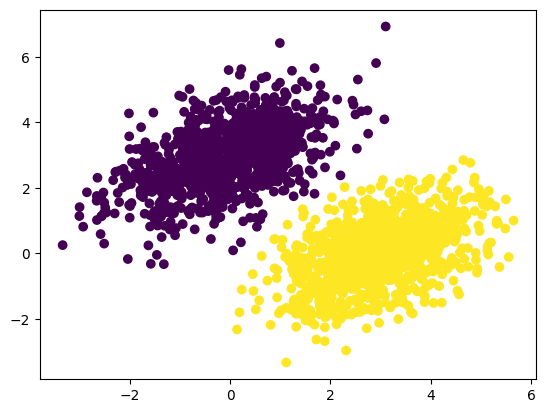

In [24]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

결정경계를 직선으로 그리려면 아래 식을 이용한다.

```python
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
```

이유는 위 모델의 예측값이 다음과 같이 계산되며,

```python
W[0]*x + W[1]*y + b
```

위 예측값이 0.5보다 큰지 여부에 따라 음성, 양성이 판단되기 때문이다.

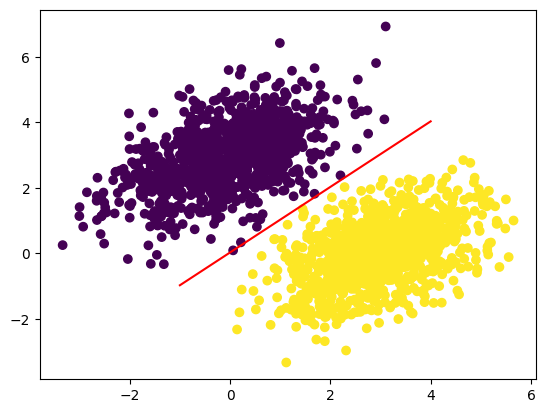

In [25]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]

plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## 3.6 케라스 신경망 모델의 핵심 API

### 3.6.1. 층

**`Dense` 클래스 직접 구현하기**

`Dense` 클래스와 유사하게 작동하는 클래스를 직접 정의하려면
상속해야 하는 `keras.layers.Layer` 클래스의 `__call()__` 메서드에 의해 호출되는
`build()` 메서드와 `call()` 메서드를 구현해야 한다.
아래 `SimpleDense` 클래스가 `Dense` 클래스의 기능을 단순화하여 구현한다.

In [26]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]   # 입력 샘플의 특성 수
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

**Example 3.1 (`SimpleDense` 층의 데이터 변환)**

- 모델 구성: 생성자에 의해 출력 샘플의 특성수와 활성화 함수 지정.
    - 입력 데이터셋 샘플의 특성수는 지정할 필요 없음.

In [27]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)

- 입력 데이터셋 지정: 입력 샘플 하나의 특성수는 784. 샘플 수는 128 개.

In [28]:
input_tensor = tf.ones(shape=(128, 784))

출력값 생성: `__call__()` 메서드를  실행하면 다음 사항들이 연속적으로 처리된다.

- 가중치 텐서와 와 편향 텐서가 생성되지 않은 경우
    - 가중치 텐서 `W` 생성 및 초기화: `(784, 32)`
    - 편향 텐서 `b` 생성 및 초기화: `(32, )`
- 생성된 가중치와 편향을 이용하여 출력값 계산(아핀 변환 및 활성화 함수 적용)

In [29]:
output_tensor = my_dense(input_tensor)

print(output_tensor.shape)

(128, 32)


### 3.6.2. 모델

**모델 컴파일**

모델의 훈련을 위해서 먼저 다음 세 가지 설정을 추가로 지정해야 한다.

- 손실 함수: 훈련 중 모델의 성능이 얼마나 나쁜지 측정.
    미분가능한 함수이어야 하며 옵티마이저가 역전파를 통해
    모델의 성능을 향상시키는 방향으로 모델의 가중치를 업데이트할 때
    참고하는 함수임.
- 옵티마이저: 백워드 패스와 역전파를 담당하는 알고리즘
- 평가지표: 훈련과 테스트 과정을 모니터링 할 때 사용되는 모델 평가 지표.
    옵티마이저와 손실함수와는 달리 훈련에 관여하지 않으면서
    모델 성능 평가에 사용됨.

In [30]:
model = keras.Sequential([keras.layers.Dense(1)])

In [31]:
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

지정된 문자열을 사용하는 대신 파이썬 객체를 직접 작성해도 된다.

In [32]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### 3.6.3. 훈련 루프

모델을 컴파일한 다음에 `fit()` 메서드를 호출하면
모델은 스텝과 에포크 단위로 반복되는 **훈련 루프**<font size='2'>training loop</font>를
지정된 횟수만큼 또는 학습이 충분히 이루어졌다는 평가가 내려질 때까지
반복하는 훈련을 시작한다.

**모델 훈련**

In [33]:
training_history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 2s 3ms/step - loss: 6.9806 - binary_accuracy: 0.5655
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 6.5739 - binary_accuracy: 0.5695
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 6.2348 - binary_accuracy: 0.5710
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 5.9102 - binary_accuracy: 0.5740
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 5.5937 - binary_accuracy: 0.5770


**훈련 결과**

훈련이 종료되면 `fit()` 메서드는 `History` 객체를 반환하며,
`history` 속성에 훈련 과정 중에 측정된 손실값, 평가지표를 에포크 단위로 기억한다.

In [34]:
training_history.history

{'loss': [6.980559825897217,
  6.573873043060303,
  6.234823226928711,
  5.9101762771606445,
  5.593691825866699],
 'binary_accuracy': [0.565500020980835,
  0.5695000290870667,
  0.5709999799728394,
  0.5740000009536743,
  0.5770000219345093]}

**검증 데이터 활용**

아래 과정은 훈련 세트와 검증 세트를 수동으로 구분하는 방법을 보여준다.

- `np.random.permutation()` 함수는 숫자들을 무작위로 섞는다.
    이를 이용하여 훈련세트의 인덱스를 무작위로 섞는다.

In [35]:
indices_permutation = np.random.permutation(len(inputs))

- 무작위로 섞인 인덱스를 이용하여 데이터셋으르 재정렬 한다.

In [36]:
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

- 재정렬된 데이터셋의 30%를 검증 세트로 분류한다.

In [37]:
num_validation_samples = int(0.3 * len(inputs))

val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]

- 나머지는 훈련 세트로 지정한다.

In [38]:
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

*훈련 중 모델 검증*

- 훈련 세트를 대상으로 하는 훈련과 검증 세트를 대상으로 하는 평가를 동시에 진행할 수 있다.

In [39]:
training_history = model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 5ms/step - loss: 4.7834 - binary_accuracy: 0.5721 - val_loss: 3.6862 - val_binary_accuracy: 0.6117
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 3.4514 - binary_accuracy: 0.5843 - val_loss: 2.5390 - val_binary_accuracy: 0.6400
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 2.3223 - binary_accuracy: 0.6150 - val_loss: 1.6349 - val_binary_accuracy: 0.6833
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 1.4795 - binary_accuracy: 0.6479 - val_loss: 0.9754 - val_binary_accuracy: 0.7183
Epoch 5/5
88/88 [==============================] - 0s 4ms/step - loss: 0.8943 - binary_accuracy: 0.6986 - val_loss: 0.5652 - val_binary_accuracy: 0.7650


`History` 객체는 훈련 세트 뿐만 아니라 검증 세트를 대상으로도 손실값과 평가지표를 기억한다.

In [40]:
training_history.history

{'loss': [4.783360004425049,
  3.451397180557251,
  2.322317123413086,
  1.4795068502426147,
  0.8943332433700562],
 'binary_accuracy': [0.5721428394317627,
  0.5842857360839844,
  0.6150000095367432,
  0.647857129573822,
  0.6985714435577393],
 'val_loss': [3.6862316131591797,
  2.5389797687530518,
  1.6348626613616943,
  0.975370466709137,
  0.5652150511741638],
 'val_binary_accuracy': [0.6116666793823242,
  0.6399999856948853,
  0.6833333373069763,
  0.7183333039283752,
  0.7649999856948853]}

*훈련 후 모델 검증*

훈련 후에 검증 세트를 이용하여 평가하려면 `evaluate()` 메서드를 이용한다.

In [41]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 4ms/step - loss: 0.5652 - binary_accuracy: 0.7650


In [42]:
print(loss_and_metrics)

[0.5652151107788086, 0.7649999856948853]


## 3.6.4 예측

훈련된 모델을 활용하는 두 가지 방법이 있다.

**모델 적용**

먼저, `__call__()` 메서드를 활용한다. 즉,
데이터셋을 모델과 함께 직접 호출한다.

In [43]:
predictions = model(val_inputs)
print(predictions[:10])

tf.Tensor(
[[ 1.8730004 ]
 [ 0.22573581]
 [ 1.3456793 ]
 [ 1.9033823 ]
 [ 0.02351168]
 [ 1.6470635 ]
 [ 0.38063893]
 [ 1.0525749 ]
 [-0.26471642]
 [-0.2573395 ]], shape=(10, 1), dtype=float32)


**`predict()` 메서드**

하지만 이 방식은 데이터셋이 매우 크면 적절하지 않을 수 있다.
따라서 `predict()` 메서드를 이용하여 배치를 활용하는 것을 추천한다.

In [44]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 2ms/step
[[ 1.8730004 ]
 [ 0.22573581]
 [ 1.3456793 ]
 [ 1.9033823 ]
 [ 0.02351168]
 [ 1.6470635 ]
 [ 0.38063893]
 [ 1.0525749 ]
 [-0.26471642]
 [-0.2573395 ]]
